Model 1: y ~ X1 + X2
Call: EasyLM LinearModel

Observations: 100
Parameters: 3
Degrees of Freedom (resid): 97

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0450    0.0443  46.2044    0.0000
1 2.9144    0.0491  59.3352    0.0000
2 1.4807    0.0468  31.6569    0.0000

Residual variance (sigma^2): 0.1933
R-squared: 0.9768
AIC: -161.3868
BIC: -153.5713




Model 2: y ~ X1
Call: EasyLM LinearModel

Observations: 100
Parameters: 2
Degrees of Freedom (resid): 98

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0560    0.1482  13.8711    0.0000
1 2.7023    0.1630  16.5827    0.0000

Residual variance (sigma^2): 2.1683
R-squared: 0.7373
AIC: 79.3722
BIC: 84.5825




Model 3: y ~ X1 + X2 + X3
Call: EasyLM LinearModel

Observations: 100
Parameters: 4
Degrees of Freedom (resid): 96

Coefficients:
   Coef.  Std.Err.  t value  Pr(>|t|)
0 2.0438    0.0446  45.8056    0.0000
1 2.9113    0.0502  57.9500    0.0000
2 1.4809    0.0470  31.5120    0.0000
3 0.0135    0.0417   0.3224    0.

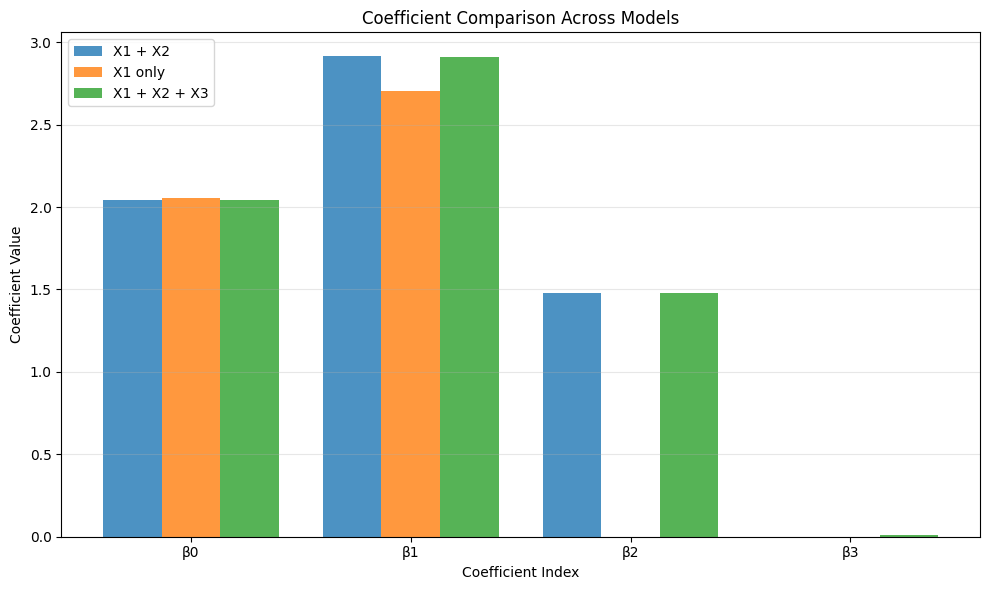

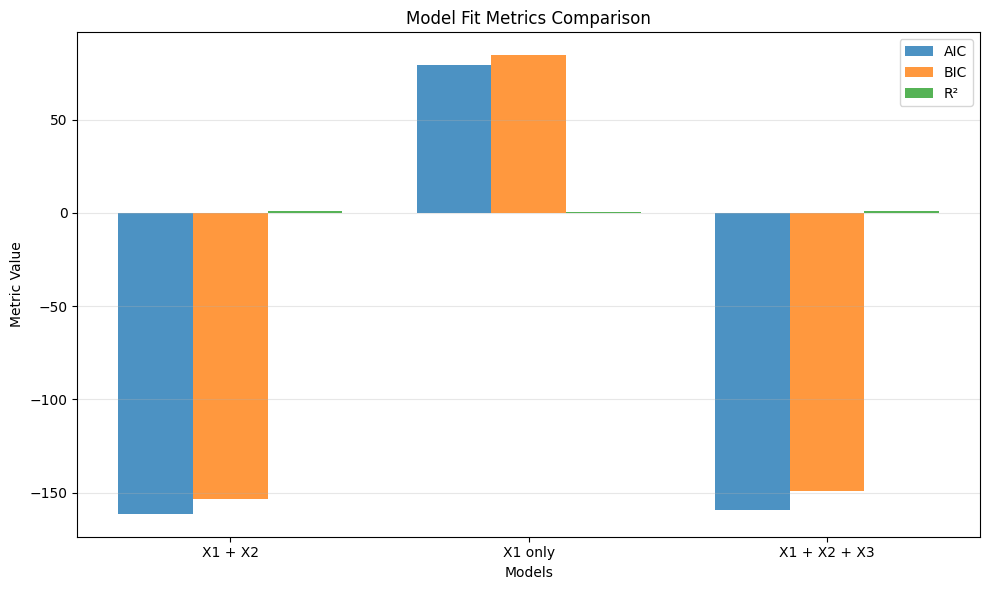

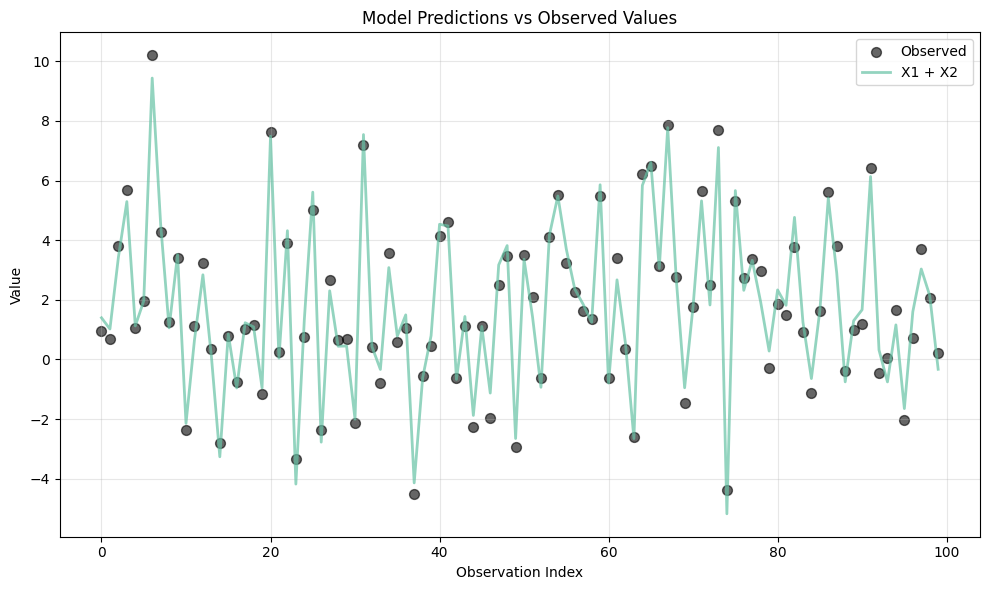

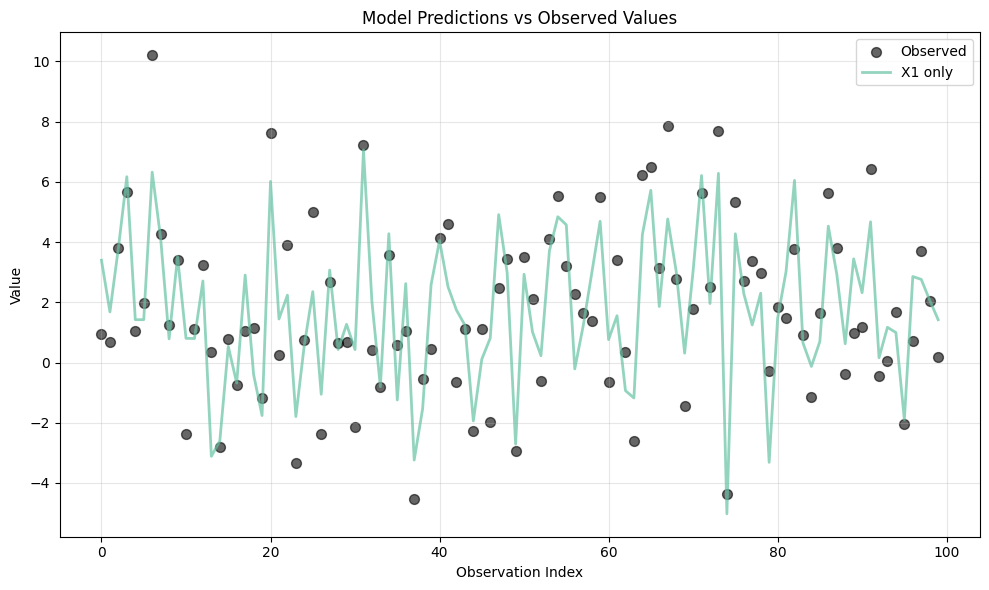

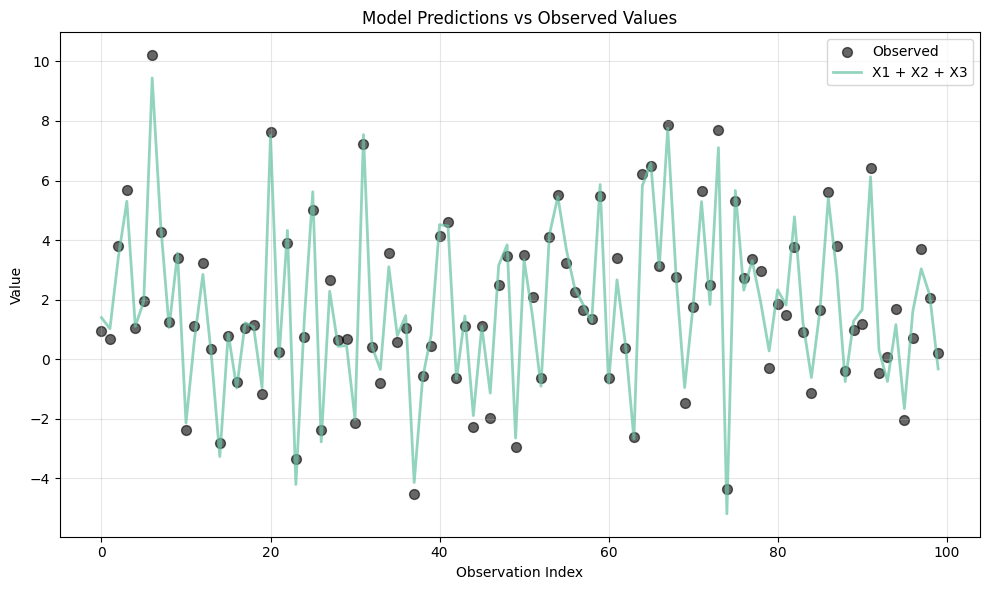

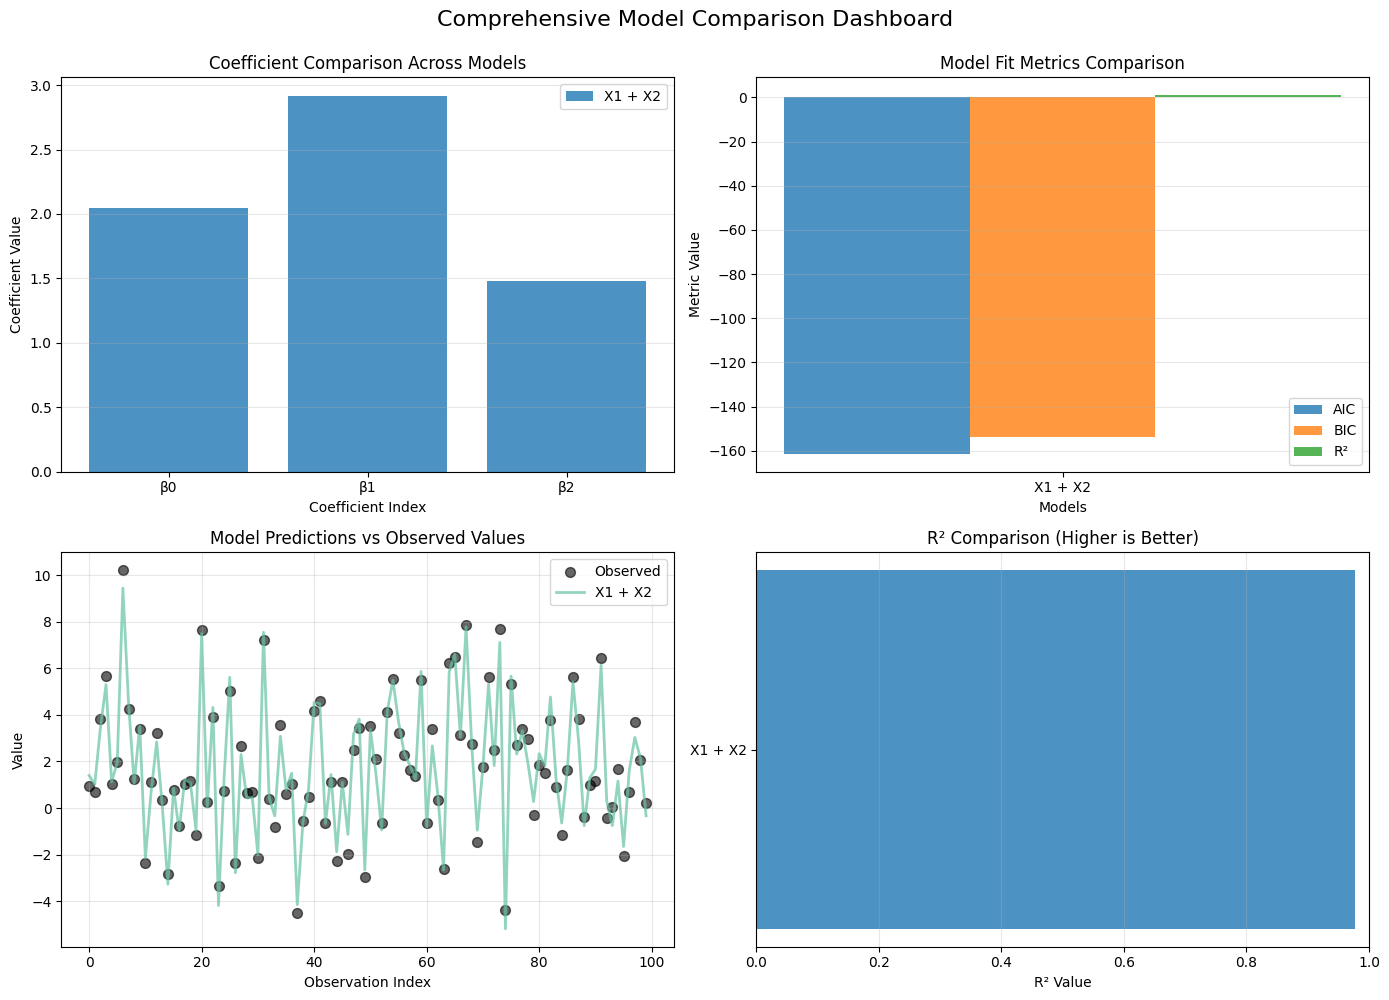

Analysis complete! 6 plots saved.


In [8]:
"""
EasyLM Quickstart - Model Comparison
Demonstrates R-style lm() and summary() in Python
"""

from EasyLM import LinearModel, ModelComparator, PlotHelper
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Generate sample data
np.random.seed(42)
n = 100
X1 = np.random.randn(n)
X2 = np.random.randn(n)
X3 = np.random.randn(n)
y = 2 + 3*X1 + 1.5*X2 + np.random.randn(n) * 0.5

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
#print("Sample Data (True model: y = 2 + 3*X1 + 1.5*X2 + noise)")
#print(df.head())
#print("\n")

# Fit Model 1: X1 + X2 (True Model)
X1_data = df[['X1', 'X2']].values
y_data = df['y'].values

model1 = LinearModel(add_intercept=True)
model1.fit(X1_data, y_data)
model1.name = "Model 1: X1 + X2"

print("Model 1: y ~ X1 + X2")
print(model1.summary())
print("\n" * 3)

# Fit Model 2: X1 only (Underfitted)
X2_data = df[['X1']].values

model2 = LinearModel(add_intercept=True)
model2.fit(X2_data, y_data)
model2.name = "Model 2: X1 only"

print("Model 2: y ~ X1")
print(model2.summary())
print("\n" * 3)

# Fit Model 3: X1 + X2 + X3 (Overfitted)
X3_data = df[['X1', 'X2', 'X3']].values

model3 = LinearModel(add_intercept=True)
model3.fit(X3_data, y_data)
model3.name = "Model 3: X1 + X2 + X3"

print("Model 3: y ~ X1 + X2 + X3")
print(model3.summary())
print("\n" * 3)

# Visual comparison of all models
models = [model1, model2, model3]
labels = ["X1 + X2", "X1 only", "X1 + X2 + X3"]

# Plot 1: Coefficient comparison
fig1, ax1 = plt.subplots(figsize=(10, 6))
PlotHelper.plot_coefficients_comparison(models, labels=labels, ax=ax1)
plt.tight_layout()
plt.savefig('plot1_coefficients.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 2: Metrics comparison
fig2, ax2 = plt.subplots(figsize=(10, 6))
PlotHelper.plot_model_metrics(models, labels=labels, ax=ax2)
plt.tight_layout()
plt.savefig('plot2_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 3: Model 1 predictions
fig3, ax3 = plt.subplots(figsize=(10, 6))
PlotHelper.plot_predictions_comparison([model1], X1_data, y_data, labels=["X1 + X2"], ax=ax3)
plt.tight_layout()
plt.savefig('plot3_predictions_model1.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 4: Model 2 predictions
fig4, ax4 = plt.subplots(figsize=(10, 6))
PlotHelper.plot_predictions_comparison([model2], X2_data, y_data, labels=["X1 only"], ax=ax4)
plt.tight_layout()
plt.savefig('plot4_predictions_model2.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 5: Model 3 predictions
fig5, ax5 = plt.subplots(figsize=(10, 6))
PlotHelper.plot_predictions_comparison([model3], X3_data, y_data, labels=["X1 + X2 + X3"], ax=ax5)
plt.tight_layout()
plt.savefig('plot5_predictions_model3.png', dpi=150, bbox_inches='tight')
plt.show()

# Plot 6: Comprehensive dashboard (Best Model)
fig6 = PlotHelper.plot_comprehensive_comparison([model1], X1_data, y_data, labels=["X1 + X2"])
plt.tight_layout()
plt.savefig('plot6_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("Analysis complete! 6 plots saved.")

In [1]:
import EasyLM
print("EasyLM __file__ in notebook:", EasyLM.__file__)

# Test submodule imports explicitly
try:
    from EasyLM import exceptions, utils, base_model, summary_formatter, linear_model, model_comparator, plot_helper
    print("Submodules imported directly from EasyLM package.")
except Exception as e:
    print("Importing submodules from EasyLM failed:", repr(e))

# Test the original style
try:
    from EasyLM.exceptions import EasyLMError, FitError, PredictError
    print("from EasyLM.exceptions import ... works")
except Exception as e:
    print("from EasyLM.exceptions import ... failed:", repr(e))


EasyLM __file__ in notebook: C:\Users\Kyle\Desktop\GITHUB\EasyLM\EasyLM\__init__.py
Submodules imported directly from EasyLM package.
from EasyLM.exceptions import ... works
